In [13]:
import sys
import ast
from os import path
import pandas as pd
sys.path.insert(0, '/home/iftekhar/AI-system/visualizer/nlplot/')

In [3]:
from nlplot import NLPlot

In [9]:
file = open(path.join('/home/iftekhar/amiebot/Resources/876/data/', "tokenized_dict.json"), "r")
contents = file.read()
features_dict = ast.literal_eval(contents)
file.close()

In [19]:
df = pd.DataFrame(enumerate(features_dict['0']), columns=['page_id', 'text'])

In [ ]:
df.head(25)

In [44]:
df = df[df['text']!='']

In [50]:
df = df.reset_index()
df.head()

,index,page_id,text
0,0,0,カスタマイザー この タイトル 設定 できる ます
1,1,1,カスタマイザー この サブタイトル 設定 できる ます
2,2,2,MobiControl 設定 順序 MobiControl 設定 順序 MobiCont...
3,6,6,端末 OS 対象 オンプレミス MobiControl サーバ 必要 設定 事項...
4,7,7,会社 支給 端末 iOS Android 複数 従業員 共用 必須


In [66]:
# target_col as a list type or a string separated by a space.
npt = NLPlot(df, target_col='text')

In [70]:
# Stopword calculations can be performed.
stopwords = npt.get_stopword(top_n=30, min_freq=0)

# 1. N-gram bar chart
npt.bar_ngram(title='uni-gram', ngram=1, top_n=50)

100%|██████████| 126/126 [00:00<00:00, 165928.51it/s]


In [71]:
npt.bar_ngram(title='bi-gram', ngram=3, top_n=20)

100%|██████████| 126/126 [00:00<00:00, 142948.96it/s]


In [55]:
npt.bar_ngram(title='bi-gram', ngram=3, top_n=20, stopwords=stopwords)

100%|██████████| 126/126 [00:00<00:00, 99059.48it/s]


In [56]:
# 2. N-gram tree Map
npt.treemap(title='Tree of Most Common Words', ngram=2, top_n=20, stopwords=stopwords)


100%|██████████| 126/126 [00:00<00:00, 58544.62it/s]


In [57]:
# 3. Histogram of the word count
npt.word_distribution(title='words distribution')

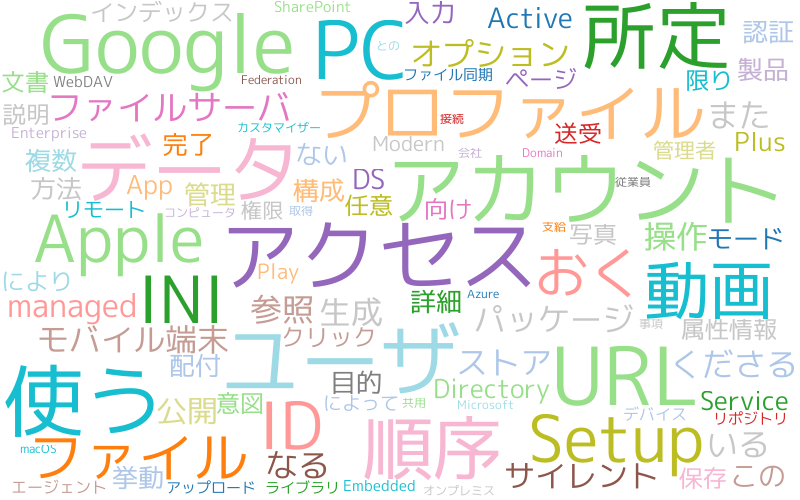

In [58]:
# 4. wordcloud
npt.wordcloud(stopwords=stopwords, colormap='tab20_r')

In [64]:
# 5. co-occurrence networks
npt.build_graph(stopwords=stopwords, min_edge_frequency=3)


node_size:27, edge_size:32


In [65]:
npt.co_network(title='Co-occurrence network')


/home/iftekhar/amiebot/experiment_env/lib/python3.6/site-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/home/iftekhar/amiebot/experiment_env/lib/python3.6/site-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/home/iftekhar/amiebot/experiment_env/lib/python3.6/site-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/home/iftekhar/amiebot/experiment_env/lib/python3.6/site-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/home/iftekhar/amiebot/experiment_env/lib/python3.6/site-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/home/iftekhar/amiebot/experiment_env/lib/python3.6/site-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

In [62]:


# The number of nodes and edges to which this output is plotted.
# If this number is too large, plotting will take a long time, so adjust the [min_edge_frequency] well.
#>> node_size:70, edge_size:166


# 7. pyLDAvis
# If you want to run it in a notebook environment, you need to use the import and magic commands
import pyLDAvis
pyLDAvis.enable_notebook()
npt.ldavis(num_topics=5, passes=5, save=False)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.125021 -0.021111       1        1  27.236662
4      0.112320  0.115090       2        1  20.202738
2     -0.006493 -0.126760       3        1  19.232437
0     -0.033530 -0.028345       4        1  18.740173
1     -0.197318  0.061125       5        1  14.587994, topic_info=       Term        Freq       Total Category  logprob  loglift
173   コンテンツ   14.000000   14.000000  Default  30.0000  30.0000
35       端末  104.000000  104.000000  Default  29.0000  29.0000
52      アプリ   29.000000   29.000000  Default  28.0000  28.0000
83       登録   36.000000   36.000000  Default  27.0000  27.0000
64       配布    8.000000    8.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
69       PC    1.983391    7.288870   Topic5  -4.5966   0.6234
175     データ    1.882687    6.503334   Topic5  -4.6487   0.6854
57       使う    1.782331    7.314974   Topic5  -4.7035   0.5130
27      サーバ    1.830104   17.227402   Topic5  -4.6770  -0.3172
107  インストール    1.753463   11.435184   Topic5  -4.7198   0.0499

[282 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
10        2  0.878675       AD
10        4  0.109834       AD
11        2  0.725842   Active
213       3  0.810772      Add
38        1  0.191485  Android
...     ...       ...      ...
112       1  0.811683       除く
80        1  0.811683       階層
99        1  0.811685       項目
9         1  0.522481       順序
9         4  0.522481       順序

[311 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 1, 2])

In [63]:
# 6. sunburst chart
npt.sunburst(title='sunburst chart', colorscale=True)


ZeroDivisionError: Weights sum to zero, can't be normalized